<a href="https://colab.research.google.com/github/columbia-data-club/meetings/blob/main/2022/september-15-xarray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Xarray Tutorial

<div class="alert-info">

### Overview
    
* **teaching:** 60 minutes
* **exercises:** 0
* **questions:**
    * What is xarray designed to do?
    * How do I create an xarray Dataset?
    * How does indexing work with xarray?
    * How do I run computations on xarray datasets?
    * What are ways to deploy xarray datasets?
    * What does working with xarray look like in practice?
</div>


### Table of contents
1. [**Xarray primer**](#Xarray-primer)
1. [**Creating data**](#Creating-data)
1. [**Loading data**](#Loading-data)
1. [**Selecting data**](#Selecting-data)
1. [**Basic computations**](#Basic-Computations)
1. [**Advanced computations**](#Advanced-Computations)
1. [**ENSO excercise**](#ENSO-exercise)

# Source Attribution
This notebook is a composite, with some tweaks, of tutorials from the [Pangeo gallery](http://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/index.html) and Ryan Abernathey's [Earth and Environmental Data Science Book](https://https://github.com/earth-env-data-science/earth-env-data-science-book).

## Xarray primer
You may be familiar with [Pandas](https://pandas.pydata.org/pandas-docs/stable/) or [Geopandas](http://geopandas.org) as excellent libraries for analyzing tabular "labeled data". [Xarray](http://xarray.pydata.org/en/stable/) is designed to make it easier to work with with _labeled multidimensional data_. By _multidimensional data_ (also often called _N-dimensional_), we mean data with many independent dimensions or axes. For example, we might represent Earth's surface temperature $T$ as a three dimensional variable

$$ T(x, y, t) $$

where $x$ and $y$ are spatial dimensions and and $t$ is time. 

By _labeled_, we mean data that has metadata associated with it describing the names and relationships between the variables. The cartoon below shows a "data cube" schematic dataset with temperature and preciptation sharing the same three dimensions, plus longitude and latitude as auxilliary coordinates.


The point of xarray is to provide pandas-level convenience for working with this type of data.


![xarray data model](https://github.com/pydata/xarray/blob/main/doc/_static/dataset-diagram.png?raw=true)

### Xarray data structures

Like Pandas, xarray has two fundamental data structures:
* a `DataArray`, which holds a single multi-dimensional variable and its coordinates
* a `Dataset`, which holds multiple variables that potentially share the same coordinates

#### DataArray

A `DataArray` has four essential attributes:
* `values`: a `numpy.ndarray` holding the array’s values
* `dims`: dimension names for each axis (e.g., `('x', 'y', 'z')`)
* `coords`: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)
* `attrs`: an `OrderedDict` to hold arbitrary metadata (attributes)

#### DataSet

A dataset is simply an object containing multiple DataArrays indexed by variable name



## Creating data

Let's start by constructing some DataArrays manually 

In [ ]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)

In [ ]:
print('Numpy version: ', np.__version__)
print('Xarray version: ', xr.__version__)

Numpy version:  1.21.6
Xarray version:  0.20.2


Here we model the simple function

$$f(x) = sin(x)$$

on the interval $-\pi$ to $\pi$. We start by creating the data as numpy arrays.

In [ ]:
x = np.linspace(-np.pi, np.pi, 19)
f = np.sin(x)

Now we are going to put this into an xarray DataArray.

A simple DataArray without dimensions or coordinates isn't much use.

In [ ]:
da_f = xr.DataArray(f)
da_f

<xarray.DataArray (dim_0: 19)>
array([-1.22464680e-16, -3.42020143e-01, -6.42787610e-01, -8.66025404e-01,
       -9.84807753e-01, -9.84807753e-01, -8.66025404e-01, -6.42787610e-01,
       -3.42020143e-01,  0.00000000e+00,  3.42020143e-01,  6.42787610e-01,
        8.66025404e-01,  9.84807753e-01,  9.84807753e-01,  8.66025404e-01,
        6.42787610e-01,  3.42020143e-01,  1.22464680e-16])
Dimensions without coordinates: dim_0

We can add a dimension name...

In [ ]:
da_f = xr.DataArray(f, dims=['x'])
da_f

<xarray.DataArray (x: 19)>
array([-1.22464680e-16, -3.42020143e-01, -6.42787610e-01, -8.66025404e-01,
       -9.84807753e-01, -9.84807753e-01, -8.66025404e-01, -6.42787610e-01,
       -3.42020143e-01,  0.00000000e+00,  3.42020143e-01,  6.42787610e-01,
        8.66025404e-01,  9.84807753e-01,  9.84807753e-01,  8.66025404e-01,
        6.42787610e-01,  3.42020143e-01,  1.22464680e-16])
Dimensions without coordinates: x

But things get most interesting when we add a coordinate:

In [ ]:
da_f = xr.DataArray(f, dims=['x'], coords={'x': x})
da_f

<xarray.DataArray (x: 19)>
array([-1.22464680e-16, -3.42020143e-01, -6.42787610e-01, -8.66025404e-01,
       -9.84807753e-01, -9.84807753e-01, -8.66025404e-01, -6.42787610e-01,
       -3.42020143e-01,  0.00000000e+00,  3.42020143e-01,  6.42787610e-01,
        8.66025404e-01,  9.84807753e-01,  9.84807753e-01,  8.66025404e-01,
        6.42787610e-01,  3.42020143e-01,  1.22464680e-16])
Coordinates:
  * x        (x) float64 -3.142 -2.793 -2.443 -2.094 ... 2.094 2.443 2.793 3.142

This coordinate has been used to create an index, which works very similar to a Pandas index. In fact, under the hood, Xarray just reuses Pandas indexes.

In [ ]:
da_f.indexes


x: Float64Index([  -3.141592653589793,   -2.792526803190927,   -2.443460952792061,
                  -2.0943951023931957,  -1.7453292519943295,  -1.3962634015954636,
                  -1.0471975511965979,  -0.6981317007977319, -0.34906585039886595,
                                  0.0,  0.34906585039886595,   0.6981317007977319,
                   1.0471975511965974,   1.3962634015954638,   1.7453292519943293,
                   2.0943951023931957,    2.443460952792061,   2.7925268031909267,
                    3.141592653589793],
                dtype='float64', name='x')

Xarray has built-in plotting, like pandas.

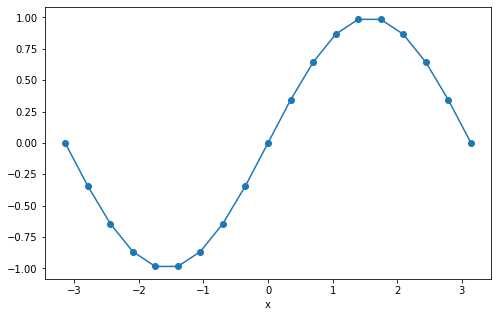

In [ ]:
da_f.plot(marker='o')

### Selecting Data

We can always use regular numpy indexing and slicing on DataArrays to get the data back out.

In [ ]:
# get the 10th item
da_f[10]

<xarray.DataArray ()>
array(0.34202014)
Coordinates:
    x        float64 0.3491

In [ ]:
# get the first 10 items
da_f[:10]

<xarray.DataArray (x: 10)>
array([-1.22464680e-16, -3.42020143e-01, -6.42787610e-01, -8.66025404e-01,
       -9.84807753e-01, -9.84807753e-01, -8.66025404e-01, -6.42787610e-01,
       -3.42020143e-01,  0.00000000e+00])
Coordinates:
  * x        (x) float64 -3.142 -2.793 -2.443 -2.094 ... -0.6981 -0.3491 0.0

However, it is often much more powerful to use xarray's `.sel()` method to use label-based indexing. This allows us to fetch values based on the value of the coordinate, not the numerical index.

In [ ]:
da_f.sel(x=0)

<xarray.DataArray ()>
array(0.)
Coordinates:
    x        float64 0.0

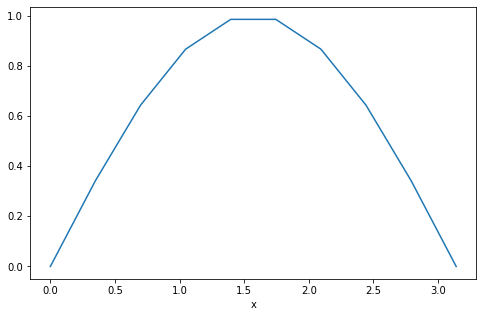

In [ ]:
da_f.sel(x=slice(0, np.pi)).plot()

### Basic Computations

When we perform mathematical manipulations of xarray DataArrays, the coordinates come along for the ride.
Imagine we want to calcuate

$$ g = f^2 + 1 $$

We can apply familiar numpy operations to xarray objects.


In [ ]:
da_g = da_f**2 + 1
da_g

<xarray.DataArray (x: 19)>
array([1.        , 1.11697778, 1.41317591, 1.75      , 1.96984631,
       1.96984631, 1.75      , 1.41317591, 1.11697778, 1.        ,
       1.11697778, 1.41317591, 1.75      , 1.96984631, 1.96984631,
       1.75      , 1.41317591, 1.11697778, 1.        ])
Coordinates:
  * x        (x) float64 -3.142 -2.793 -2.443 -2.094 ... 2.094 2.443 2.793 3.142

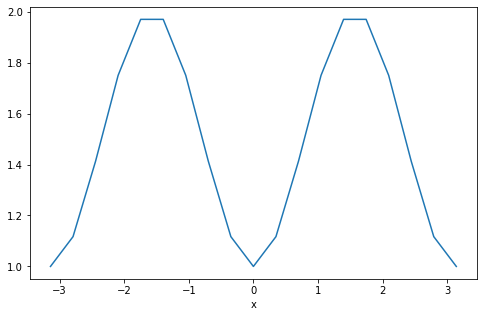

In [ ]:
da_g.plot()

### Exercise

- Multipy the DataArrays `da_f` and `da_g` together.
- Select the range $-1 < x < 1$
- Plot the result

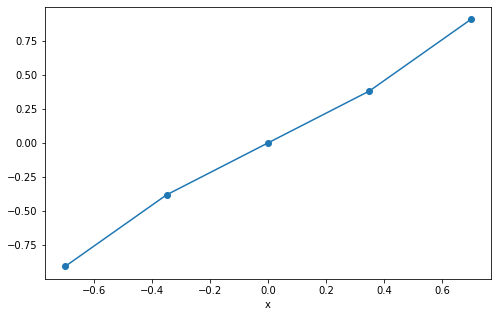

In [ ]:
(da_f * da_g).sel(x=slice(-1, 1)).plot(marker='o')

## Multidimensional Data

If we are just dealing with 1D data, Pandas and Xarray have very similar capabilities. Xarray's real potential comes with multidimensional data.

At this point we will load data from a netCDF file into an xarray dataset.

In [ ]:
%%bash

git clone https://github.com/pangeo-data/tutorial-data.git

Cloning into 'tutorial-data'...


In [ ]:
ds = xr.open_dataset('./tutorial-data/sst/NOAA_NCDC_ERSST_v3b_SST-1960.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 12)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 1960-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [ ]:
## Xarray > v0.14.1 has a new HTML output type!
xr.set_options(display_style="html")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 12)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 1960-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [ ]:
# both do the exact same thing

# dictionary syntax
sst = ds['sst']

# attribute syntax
sst = ds.sst

sst

<xarray.DataArray 'sst' (time: 12, lat: 89, lon: 180)>
[192240 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 1960-12-15
Attributes:
    pointwidth:          1.0
    valid_min:           -3.0
    valid_max:           45.0
    units:               degree_Celsius
    long_name:           Extended reconstructed sea surface temperature
    standard_name:       sea_surface_temperature
    iridl:hasSemantics:  iridl:SeaSurfaceTemperature

### Multidimensional Indexing

In this example, we take advantage of the fact that xarray understands time to select a particular date

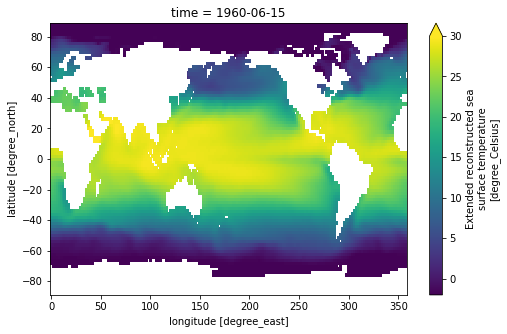

In [ ]:
sst.sel(time='1960-06-15').plot(vmin=-2, vmax=30)

But we can select along any axis

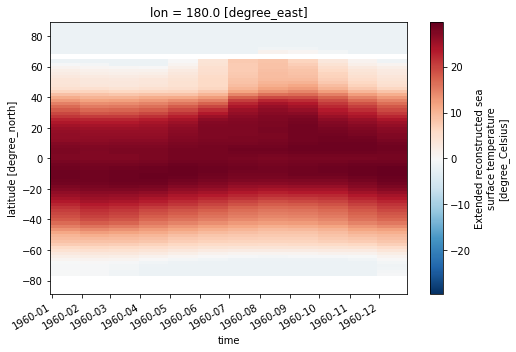

In [ ]:
sst.sel(lon=180).transpose().plot()

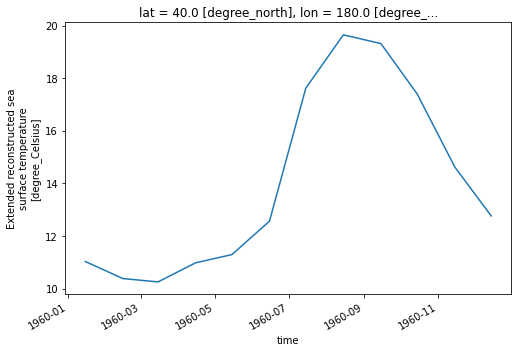

In [ ]:
sst.sel(lon=180, lat=40).plot()

### Label-Based Reduction Operations

Usually the process of data analysis involves going from a big, multidimensional dataset to a few concise figures.
Inevitably, the data must be "reduced" somehow. Examples of simple reduction operations include:

- Mean
- Standard Deviation
- Minimum
- Maximum

etc. Xarray supports all of these and more, via a familiar numpy-like syntax. But with xarray, you can specify the reductions by dimension.

First we start with the default, reduction over all dimensions:

In [ ]:
sst.mean()

<xarray.DataArray 'sst' ()>
array(13.626506, dtype=float32)

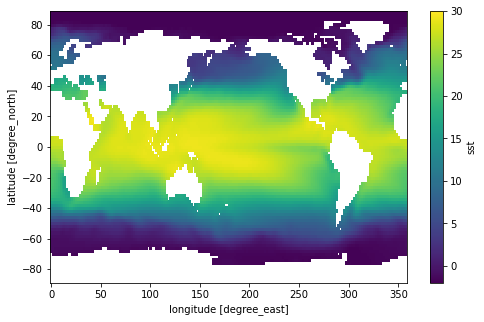

In [ ]:
sst_time_mean = sst.mean(dim='time')
sst_time_mean.plot(vmin=-2, vmax=30)

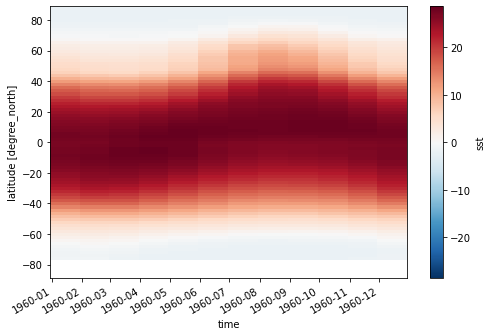

In [ ]:
sst_zonal_mean = sst.mean(dim='lon')
sst_zonal_mean.transpose().plot()

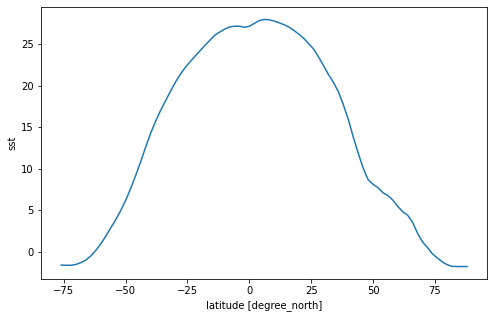

In [ ]:
sst_time_and_zonal_mean = sst.mean(dim=('time', 'lon'))
sst_time_and_zonal_mean.plot()

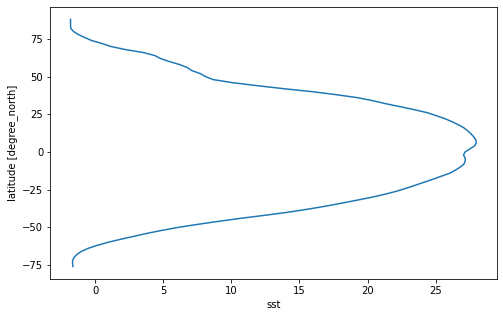

In [ ]:
# some might prefer to have lat on the y axis
sst_time_and_zonal_mean.plot(y='lat')

### More Complicated Example: Weighted Mean

The means we calculated above were "naive"; they were straightforward numerical means over the different dimensions of the dataset. They did not account, for example, for spherical geometry of the globe and the necessary weighting factors. Although xarray is very useful for geospatial analysis, **it has no built-in understanding of geography**.

Below we show how to create a proper weighted mean by using the formula for the area element in spherical coordinates. This is a good illustration of several xarray concepts.

The [area element for lat-lon coordinates](https://en.wikipedia.org/wiki/Spherical_coordinate_system#Integration_and_differentiation_in_spherical_coordinates) is

$$ \delta A = R^2 \delta \phi \delta \lambda \cos(\phi) $$

where $\phi$ is latitude, $\delta \phi$ is the spacing of the points in latitude, $\delta \lambda$ is the spacing of the points in longitude, and $R$ is Earth's radius. (In this formula, $\phi$ and $\lambda$ are measured in radians.) Let's use xarray to create the weight factor.

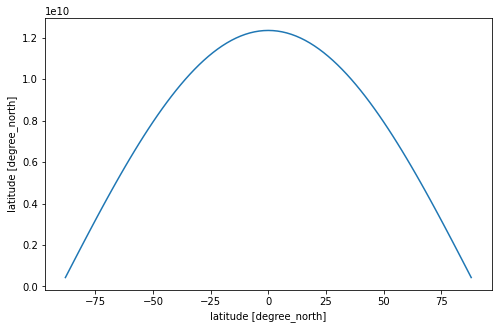

In [ ]:
R = 6.37e6
# we know already that the spacing of the points is one degree latitude
dϕ = np.deg2rad(1.)
dλ = np.deg2rad(1.)
dA = R**2 * dϕ * dλ * np.cos(np.deg2rad(ds.lat))
dA.plot()

In [ ]:
dA.where(sst[0].notnull())

<xarray.DataArray 'lat' (lat: 89, lon: 180)>
array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [1.2920163e+09, 1.2920163e+09, 1.2920163e+09, ..., 1.2920163e+09,
        1.2920163e+09, 1.2920163e+09],
       [8.6222048e+08, 8.6222048e+08, 8.6222048e+08, ..., 8.6222048e+08,
        8.6222048e+08, 8.6222048e+08],
       [4.3137274e+08, 4.3137274e+08, 4.3137274e+08, ..., 4.3137274e+08,
        4.3137274e+08, 4.3137274e+08]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    time     datetime64[ns] 1960-01-15
Attributes:
    standard_name:  latitude
    pointwidth:     2.0
    gridtype:       0
    units:          degree_north

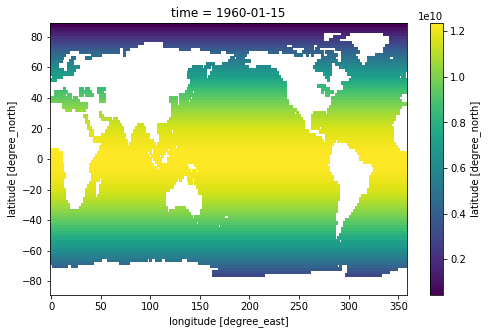

In [ ]:
pixel_area = dA.where(sst[0].notnull())
pixel_area.plot()

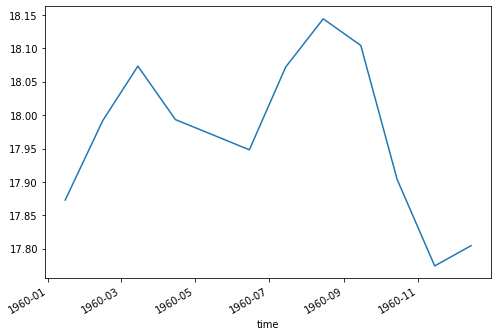

In [ ]:
total_ocean_area = pixel_area.sum(dim=('lon', 'lat'))
sst_weighted_mean = (sst * pixel_area).sum(dim=('lon', 'lat')) / total_ocean_area
sst_weighted_mean.plot()

### Maps

Xarray integrates with cartopy to enable you to plot your data on a map

We first need to load Cartopy into google colab, as it is not natively installed.  This breaks dependencies, which we fix. 

In [ ]:
!pip install cartopy
!pip uninstall shapely
!pip install shapely --no-binary shapely

import cartopy.crs as ccrs
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 5.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 39.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 27.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 48.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 34.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 3.5 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


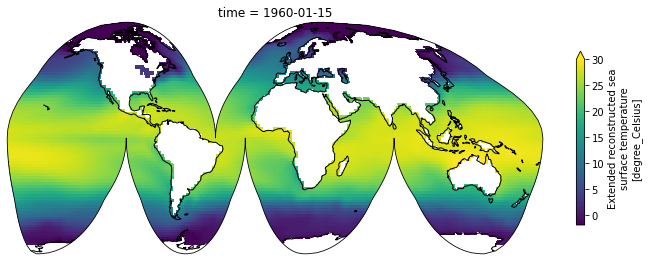

In [ ]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
ax.coastlines()

sst[0].plot(transform=ccrs.PlateCarree(), vmin=-2, vmax=30,
            cbar_kwargs={'shrink': 0.4});

## IV. Opening Many Files

One of the killer features of xarray is its ability to open many files into a single dataset. We do this with the `open_mfdataset` function.

In [ ]:
ds = xr.open_mfdataset('./tutorial-data/sst/*nc', combine='by_coords')
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 dask.array<chunksize=(12, 89, 180), meta=np.ndarray>
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

Now we have 57 years of data instead of one!

## V. Groupby

Now that we have a bigger dataset, this is a good time to check out xarray's groupby capabilities.

Xarray copies Pandas' very useful groupby functionality, enabling the "split / apply / combine" workflow on xarray DataArrays and Datasets. 

In [ ]:
sst_clim = ds.sst.groupby('time.month').mean(dim='time')
sst_clim

<xarray.DataArray 'sst' (month: 12, lat: 89, lon: 180)>
dask.array<stack, shape=(12, 89, 180), dtype=float32, chunksize=(1, 89, 180), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Now the data has dimension `month` instead of time!
Each value represents the average among all of the Januaries, Februaries, etc. in the dataset.

Text(0.5, 1.0, 'June minus July SST Climatology')

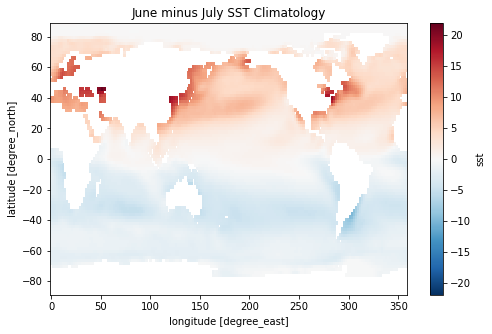

In [ ]:
(sst_clim[6] - sst_clim[0]).plot()
plt.title('June minus July SST Climatology')

## VI. Resample and Rolling

Resample is meant specifically to work with time data (data with a `datetime64` variable as a dimension).
It allows you to change the time-sampling frequency of your data.

Let's illustrate by selecting a single point.

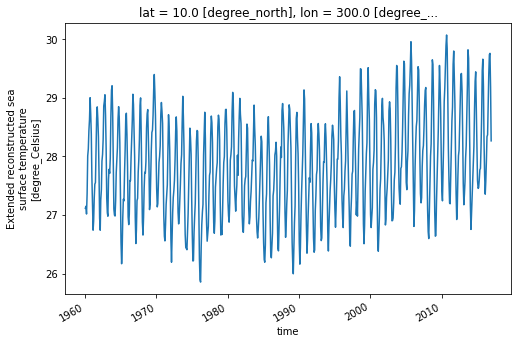

In [ ]:
sst_ts = ds.sst.sel(lon=300, lat=10)
sst_ts.plot()

As we can see from the plot, the timeseries at any one point is totally dominated by the seasonal cycle. We would like to remove this seasonal cycle (called the "climatology") in order to better see the long-term variaitions in temperature. We will accomplish this using groupby.






The syntax of Xarray's groupby is almost identical to Pandas. We will first apply groupby to a single DataArray.



In [ ]:
sst_ts.groupby?


**Split Step**


The most important argument is group: this defines the unique values we will us to "split" the data for grouped analysis. We can pass either a DataArray or a name of a variable in the dataset. Lets first use a DataArray. Just like with Pandas, we can use the time index to extract specific components of dates and times. Xarray uses a special syntax for this .dt, called the DatetimeAccessor.



In [ ]:
ds.time.dt


In [ ]:
ds.time.dt.month


<xarray.DataArray 'month' (time: 684)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
...
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12])
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15

We can use these arrays in a groupby operation:



In [ ]:
gb = ds.sst.groupby(ds.time.dt.month)
gb

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

Xarray also offers a more concise syntax when the variable you're grouping on is already present in the dataset. This is identical to the previous line:



In [ ]:
gb = ds.sst.groupby('time.month')
gb

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

Now that the data are split, we can manually iterate over the group. The iterator returns the key (group name) and the value (the actual dataset corresponding to that group) for each group.

In [ ]:
for group_name, group_da in gb:
    # stop iterating after the first loop
    break 
print(group_name)
group_da

1


<xarray.DataArray 'sst' (time: 57, lat: 89, lon: 180)>
dask.array<getitem, shape=(57, 89, 180), dtype=float32, chunksize=(1, 89, 180), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1961-01-15 ... 2016-01-15
Attributes:
    pointwidth:          1.0
    valid_min:           -3.0
    valid_max:           45.0
    units:               degree_Celsius
    long_name:           Extended reconstructed sea surface temperature
    standard_name:       sea_surface_temperature
    iridl:hasSemantics:  iridl:SeaSurfaceTemperature

**Map & Combine**


Now that we have groups defined, it's time to "apply" a calculation to the group. Like in Pandas, these calculations can either be:

aggregation: reduces the size of the group
transformation: preserves the group's full size
At then end of the apply step, xarray will automatically combine the aggregated / transformed groups back into a single object.



> {warning} Xarray calls the "apply" step `map`. This is different from Pandas!



The most fundamental way to apply is with the .map method.





In [ ]:
gb.map?


**Aggregations**


`.apply` accepts as its argument a function. We can pass an existing function:



In [ ]:
gb.map(np.mean)


<xarray.DataArray 'sst' (month: 12)>
dask.array<concatenate, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Because we specified no extra arguments (like axis) the function was applied over all space and time dimensions. This is not what we wanted. Instead, we could define a custom function. This function takes a single argument--the group dataset--and returns a new dataset to be combined:



In [ ]:
def time_mean(a):
    return a.mean(dim='time')

gb.apply(time_mean)

<xarray.DataArray 'sst' (month: 12, lat: 89, lon: 180)>
dask.array<concatenate, shape=(12, 89, 180), dtype=float32, chunksize=(1, 89, 180), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Like Pandas, xarray's groupby object has many built-in aggregation operations (e.g. mean, min, max, std, etc):



In [ ]:
# this does the same thing as the previous cell
sst_mm = gb.mean(dim='time')
sst_mm

<xarray.DataArray 'sst' (month: 12, lat: 89, lon: 180)>
dask.array<stack, shape=(12, 89, 180), dtype=float32, chunksize=(1, 89, 180), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

So we did what we wanted to do: calculate the climatology at every point in the dataset. Let's look at the data a bit.

_Climatology at a specific point in the North Atlantic_



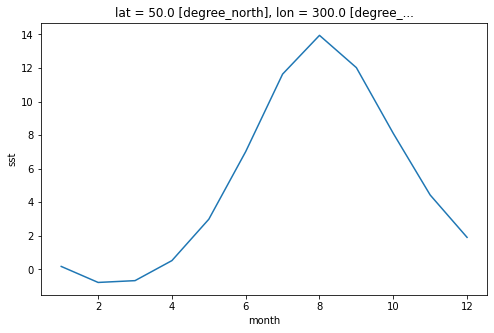

In [ ]:
sst_mm.sel(lon=300, lat=50).plot()


_Zonal Mean Climatology_

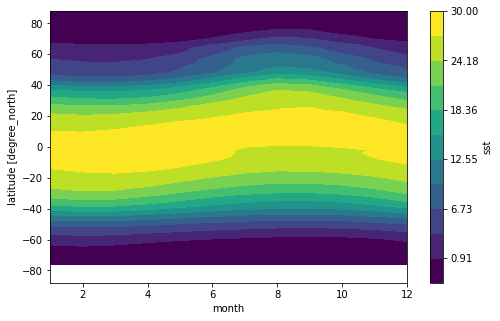

In [ ]:
sst_mm.mean(dim='lon').transpose().plot.contourf(levels=12, vmin=-2, vmax=30)


_Difference between January and July Climatology_



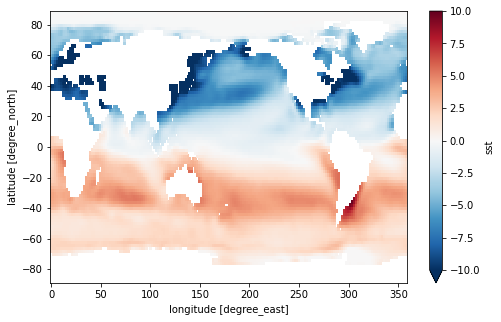

In [ ]:
(sst_mm.sel(month=1) - sst_mm.sel(month=7)).plot(vmax=10)


**Transformations**


Now we want to remove this climatology from the dataset, to examine the residual, called the anomaly, which is the interesting part from a climate perspective. Removing the seasonal climatology is a perfect example of a transformation: it operates over a group, but doesn't change the size of the dataset. Here is one way to code it.



In [ ]:
def remove_time_mean(x):
    return x - x.mean(dim='time')

ds_anom = ds.groupby('time.month').apply(remove_time_mean)
ds_anom

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 dask.array<chunksize=(1, 89, 180), meta=np.ndarray>


> {note}
In the above example, we applied `groupby` to a `Dataset` instead of a `DataArray`.

Xarray makes these sorts of transformations easy by supporting groupby arithmetic. This concept is easiest explained with an example:

In [ ]:
gb = ds.groupby('time.month')
ds_anom = gb - gb.mean(dim='time')
ds_anom

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (time, lat, lon) float32 dask.array<chunksize=(1, 89, 180), meta=np.ndarray>

Now we can view the climate signal without the overwhelming influence of the seasonal cycle.

_Timeseries at a single point in the North Atlantic_

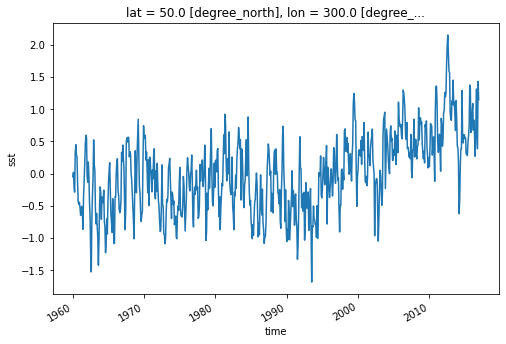

In [ ]:
ds_anom.sst.sel(lon=300, lat=50).plot();


_Difference between Jan. 15 2016 and Jan. 15 1960_

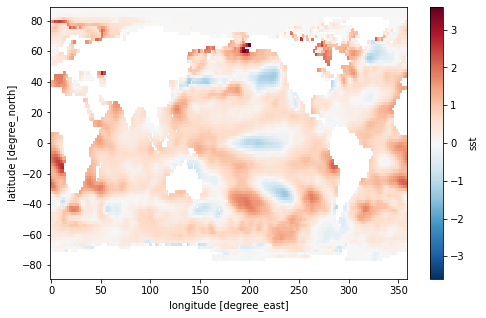

In [ ]:
(ds_anom.sel(time='2016-12-15') - ds_anom.sel(time='1960-01-15')).sst.plot()


# Grouby-Related: Resample, Rolling, Coarsen


## Resample
Resample in xarray is nearly identical to Pandas. **It can be applied only to time-index dimensions**. Here we compute the five-year mean. It is effectively a group-by operation, and uses the same basic syntax. Note that resampling changes the length of the the output arrays.

In [ ]:
ds_anom_resample = ds_anom.resample(time='5Y').mean(dim='time')
ds_anom_resample

<xarray.Dataset>
Dimensions:  (time: 13, lat: 89, lon: 180)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1965-12-31 ... 2020-12-31
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Data variables:
    sst      (time, lat, lon) float32 dask.array<chunksize=(1, 89, 180), meta=np.ndarray>

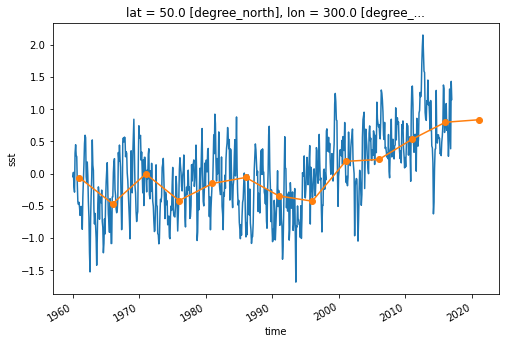

In [ ]:
ds_anom.sst.sel(lon=300, lat=50).plot()
ds_anom_resample.sst.sel(lon=300, lat=50).plot(marker='o')

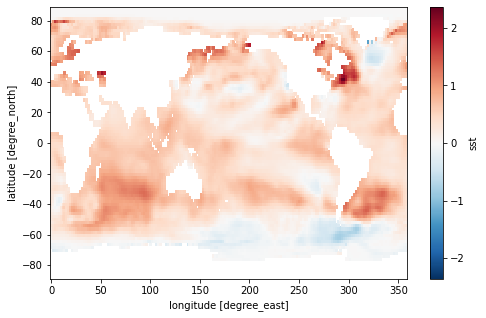

In [ ]:
(ds_anom_resample.sel(time='2015-01-01', method='nearest') -
 ds_anom_resample.sel(time='1965-01-01', method='nearest')).sst.plot()

### Rolling
Rolling is also similar to pandas. It does not change the length of the arrays. Instead, it allows a moving window to be applied to the data at each point.



An alternative approach is a "running mean" over the time dimension.
This can be accomplished with xarray's `.rolling` operation.

In [ ]:
ds_anom_rolling = ds_anom.rolling(time=12, center=True).mean()
ds_anom_rolling


<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (time, lat, lon) float64 dask.array<chunksize=(12, 89, 180), meta=np.ndarray>

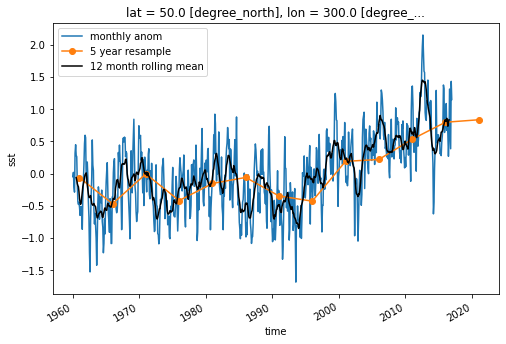

In [ ]:
ds_anom.sst.sel(lon=300, lat=50).plot(label='monthly anom')
ds_anom_resample.sst.sel(lon=300, lat=50).plot(marker='o', label='5 year resample')
ds_anom_rolling.sst.sel(lon=300, lat=50).plot(label='12 month rolling mean', color='k')
plt.legend()

## Coarsen
`coarsen` is a simple way to reduce the size of your data along one or more axes. It is very similar to `resample` when operating on time dimensions; the key difference is that `coarsen` only operates on fixed blocks of data, irrespective of the coordinate values, while `resample` actually looks at the coordinates to figure out, e.g. what month a particular data point is in.

For regularly-spaced monthly data beginning in January, the following should be equivalent to annual resampling. However, results would different for irregularly-spaced data.

In [ ]:
ds.coarsen(time=12).mean()


<xarray.Dataset>
Dimensions:  (time: 57, lat: 89, lon: 180)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-06-30T08:00:00 ... 2016-06-30T08:00:00
Data variables:
    sst      (time, lat, lon) float32 dask.array<chunksize=(1, 89, 180), meta=np.ndarray>
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

Coarsen also works on spatial coordinates (or any coordinates).



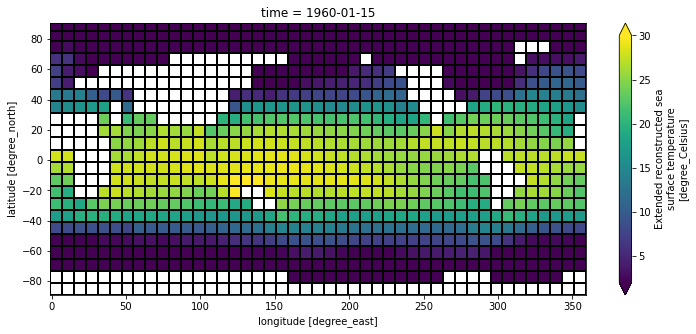

In [ ]:
ds_coarse = ds.coarsen(lon=4, lat=4, boundary='pad').mean()
ds_coarse.sst.isel(time=0).plot(vmin=2, vmax=30, figsize=(12, 5), edgecolor='k')

# An Advanced Example

In this example we will show a realistic workflow with Xarray. We will

* Load a "basin mask" dataset
* Interpolate the basins to our SST 
* dataset coordinates
* Group the SST by basin
* Convert to Pandas Dataframe and plot mean SST by basin

In [ ]:
basin = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NODC/.WOA09/.Masks/.basin/dods')
basin

<xarray.Dataset>
Dimensions:  (X: 360, Y: 180, Z: 33)
Coordinates:
  * X        (X) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * Y        (Y) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * Z        (Z) float32 0.0 10.0 20.0 30.0 50.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
Data variables:
    basin    (Z, Y, X) float32 ...
Attributes:
    Conventions:  IRIDL

In [ ]:
basin = basin.rename({'X': 'lon', 'Y': 'lat'})
basin

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 180, Z: 33)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * Z        (Z) float32 0.0 10.0 20.0 30.0 50.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
Data variables:
    basin    (Z, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL

In [ ]:
basin_surf = basin.basin[0]
basin_surf

<xarray.DataArray 'basin' (lat: 180, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [11., 11., 11., ..., 11., 11., 11.],
       [11., 11., 11., ..., 11., 11., 11.],
       [11., 11., 11., ..., 11., 11., 11.]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    Z        float32 0.0
Attributes:
    long_name:  basin code
    scale_max:  58
    CLIST:      Atlantic Ocean\nPacific Ocean \nIndian Ocean\nMediterranean S...
    valid_min:  1
    valid_max:  58
    scale_min:  1
    units:      ids

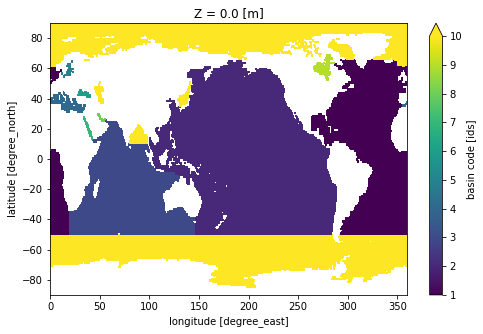

In [ ]:
basin_surf.plot(vmax=10)


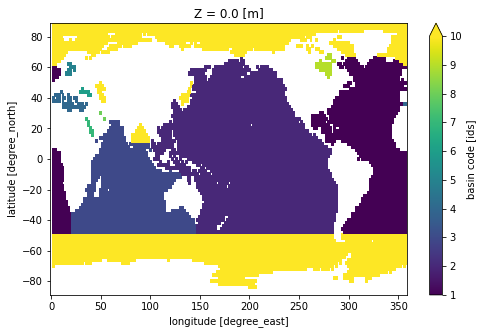

In [ ]:
basin_surf_interp = basin_surf.interp_like(ds.sst, method='nearest')
basin_surf_interp.plot(vmax=10)

In [ ]:
ds.sst.groupby(basin_surf_interp).first()


NotImplementedError: ignored

In [ ]:
ds.compute().sst.groupby(basin_surf_interp).first()


In [ ]:
basin_mean_sst = ds.sst.groupby(basin_surf_interp).mean()
basin_mean_sst

In [ ]:
df = basin_mean_sst.mean('time').to_dataframe()
df

In [ ]:
import pandas as pd
basin_names = basin_surf.attrs['CLIST'].split('\n')
basin_df = pd.Series(basin_names, index=np.arange(1, len(basin_names)+1))
basin_df

In [ ]:
df = df.join(basin_df.rename('basin_name'))


In [ ]:
df.plot.bar(y='sst', x='basin_name')


## Finale: Calculate the ENSO Index

[This page from NOAA](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst) explains how the El Niño Southern Oscillation index is calculated.


- The Nino 3.4 region is defined as the region between +/- 5 deg. lat, 170 W - 120 W lon.
- Warm or cold phases of the Oceanic Nino Index are defined by a five consecutive 3-month running mean of sea surface temperature (SST) anomalies in the Niño 3.4 region that is above (below) the threshold of +0.5°C (-0.5°C). This is known as the Oceanic Niño Index (ONI).

(Note that "anomaly" means that the seasonal cycle is removed.)

_Try working on this on your own for 5 minutes._

In [ ]:
ds_en = ds.sel(lat=slice(-5, 5), 
              lon=slice(360 - 170, 360 - 120)).sst

gb = ds_en.groupby('time.month')
ds_mm = gb.mean(dim='time')
# ds_anom = gb - gb.mean(dim='time')

ds_anom = ds_en 

ds_anom.sel(time='1960-01-15').plot()

In [ ]:
ds_anom_resample = ds_anom.resample(time='3M').mean(dim='time')

ds_anom_rolling = ds_anom_resample.rolling(time=5, center=True).mean()

In [ ]:
ds_anom_ts = ds_anom_rolling.mean(['lat', 'lon'])
ds_anom_ts_mean = ds_anom_ts.mean('time')

ds_anom_ts.plot()
plt.axhline(ds_anom_ts_mean, color='k')

Once you're done, try comparing the ENSO Index you calculated with the NINO3.4 index published by [NOAA](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/). The pandas snippet below will load the official time series for comparison.

In [ ]:
import pandas as pd
noaa_nino34 = pd.read_csv('https://www.cpc.ncep.noaa.gov/data/indices/sstoi.indices',
                          sep=r" ", skipinitialspace=True,
                          parse_dates={'time': ['YR','MON']},
                          index_col='time')['NINO3.4']
noaa_nino34.head()

In [ ]:
noaa_plt = noaa_nino34[noaa_nino34.index < '2016-01-01']

noaa_plt.plot(color='g', label='noaa')

ds_anom_ts.plot()
plt.axhline(ds_anom_ts_mean, color='k')

plt.legend()

## Getting Help with Xarray

Here are some important resources for learning more about xarray and getting help.

- [Xarray Documentation](http://xarray.pydata.org/en/latest/)
- [Xarray GitHub Issue Tracker](https://github.com/pydata/xarray/issues)
- [Xarray questions on StackOverflow](https://stackoverflow.com/questions/tagged/python-xarray)